In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dt = pd.read_csv("./Car_details_v3.csv")

In [3]:
dt.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
dt.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [4]:
# checking NAs
dt[dt.isna()==True]
# All are NA, dropping NA

dt.dropna(inplace=True)

In [5]:
dt.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [6]:
print(dt.shape)
print(dt.nunique())
print(dt.dtypes)

(7906, 13)
name             1982
year               27
selling_price     670
km_driven         898
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         320
torque            441
seats               9
dtype: int64
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object


In [7]:
## covert mileage, engine and power to numeric

dt.mileage = dt.mileage.str.extract('(\d+)')
dt.engine = dt.engine.str.extract('(\d+)')
dt.max_power = dt.max_power.str.extract('(\d+)')

In [8]:
dt.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21,1498,103,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16,1298,88,"11.5@ 4,500(kgm@ rpm)",5.0


In [9]:
## Extracting brand from Name
dt["Brand"] = dt.name.str.split().str[0]

In [10]:
## Calculating age of car
dt['age'] = 2022-dt['year']

In [11]:
## Dropiing some variables
dt.drop(columns=['name','torque','year'],axis=1,inplace=True)

In [13]:
dt.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Brand,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23,1248,74,5.0,Maruti,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21,1498,103,5.0,Skoda,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17,1497,78,5.0,Honda,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23,1396,90,5.0,Hyundai,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16,1298,88,5.0,Maruti,15


In [14]:
dt.dtypes

## covert mileage, engine and max_power
dt.mileage = dt.mileage.astype(float)
dt.engine = dt.engine.astype(float)
dt.max_power  = dt.max_power.astype(float)

In [15]:
dt.dtypes

selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
Brand             object
age                int64
dtype: object

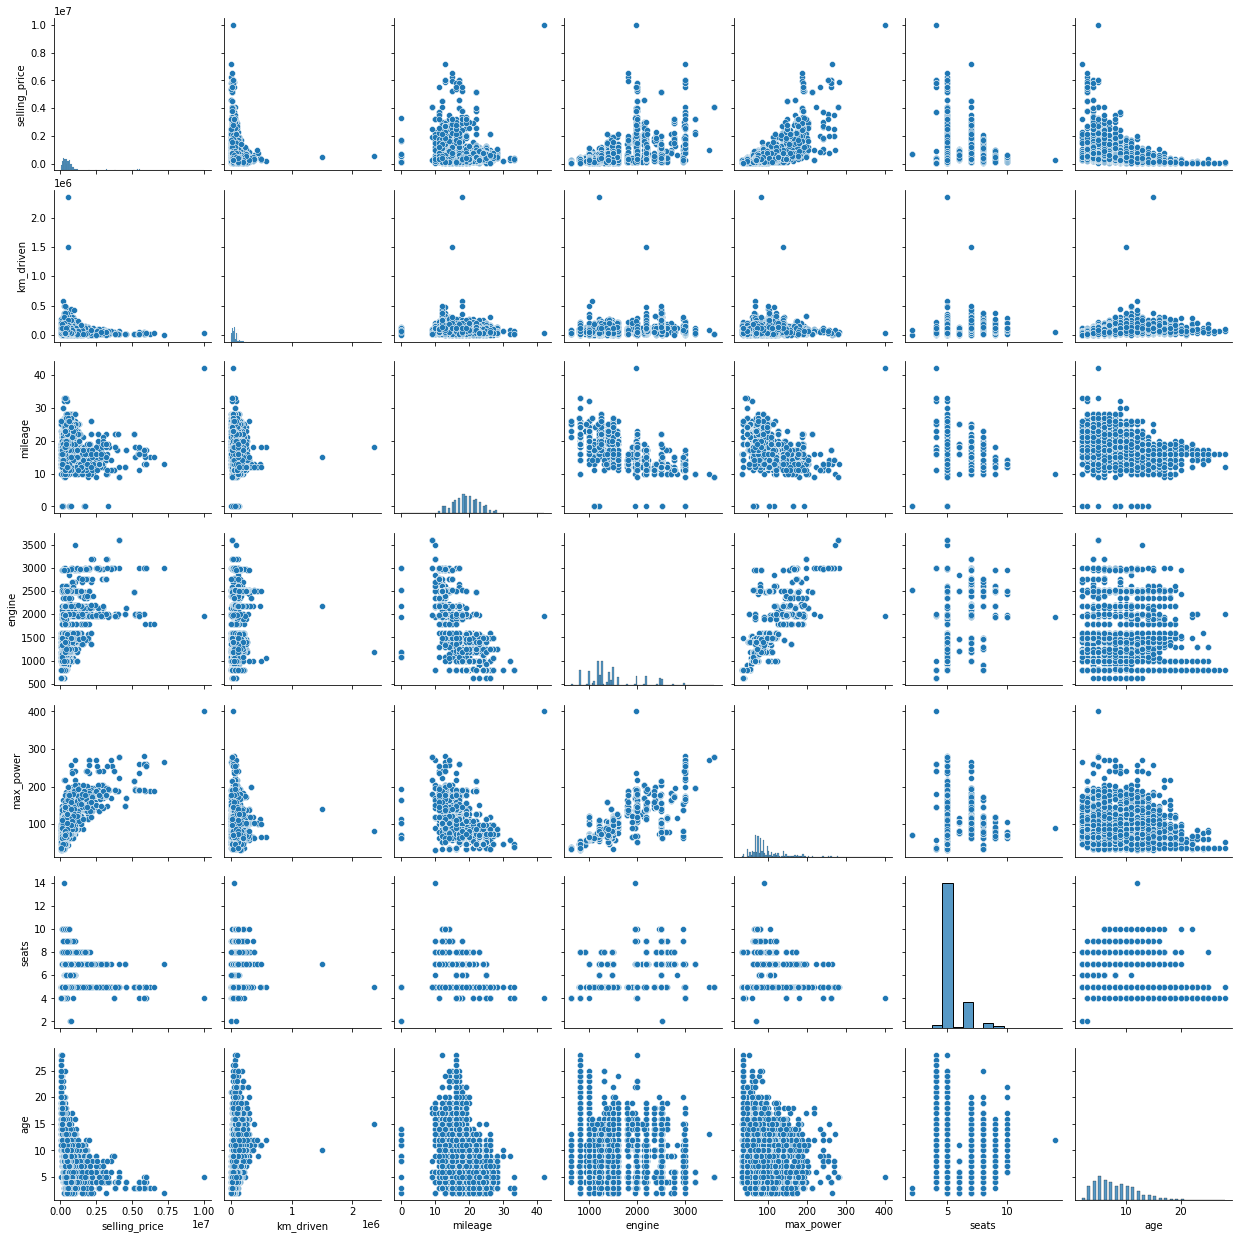

In [16]:
## Performing EDA
sns.pairplot(dt)

<AxesSubplot:>

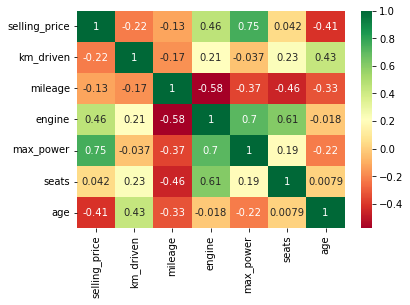

In [17]:
sns.heatmap(dt.corr(),annot=True,cmap='RdYlGn')

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

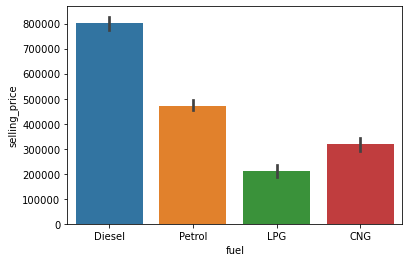

In [18]:
sns.barplot(x=dt.fuel,y=dt.selling_price)

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

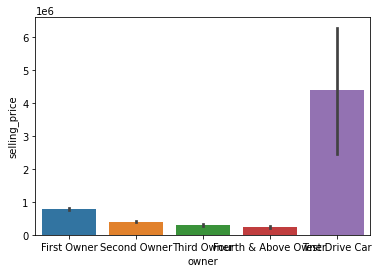

In [19]:
sns.barplot(x=dt.owner,y=dt.selling_price)

<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

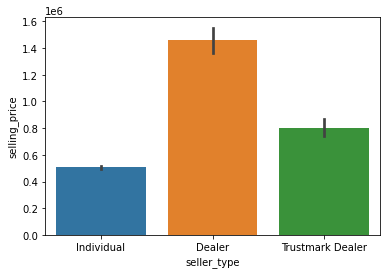

In [20]:
sns.barplot(x=dt.seller_type,y=dt.selling_price)

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

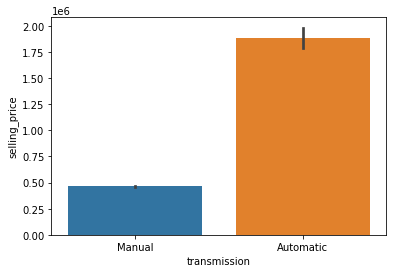

In [21]:
sns.barplot(x=dt.transmission,y=dt.selling_price)

<AxesSubplot:xlabel='selling_price', ylabel='Brand'>

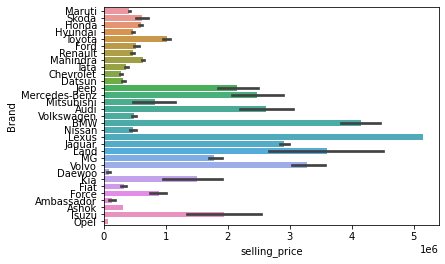

In [22]:
sns.barplot(x=dt.selling_price,y=dt.Brand,orient='h')

In [23]:
import category_encoders as ce

In [24]:
## Dropping Brand , its too many 
#dt.drop(columns=['Brand'],inplace=True)
# Introducing Target Encoding

brand1 = ce.TargetEncoder(cols=['Brand','fuel','seller_type','transmission','owner'])
coded_cols = brand1.fit_transform(dt[['Brand','fuel','seller_type','transmission','owner']],dt["selling_price"])

In [25]:
for i in coded_cols.columns:
    dt[i] = coded_cols[i]


In [26]:
dt.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Brand,age
0,450000,145500,802450.282624,507705.823556,462819.124982,789979.874976,23.0,1248.0,74.0,5.0,409011.141107,8
1,370000,120000,802450.282624,507705.823556,462819.124982,401203.484127,21.0,1498.0,103.0,5.0,609721.115385,8
2,158000,140000,472665.203125,507705.823556,462819.124982,293187.280392,17.0,1497.0,78.0,5.0,596920.886266,16
3,225000,127000,802450.282624,507705.823556,462819.124982,789979.874976,23.0,1396.0,90.0,5.0,473280.475000,12
4,130000,120000,472665.203125,507705.823556,462819.124982,789979.874976,16.0,1298.0,88.0,5.0,409011.141107,15


In [27]:
## Train Test Split
Y = dt['selling_price']
X = dt.drop(columns=['selling_price'],axis=1)

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [30]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,Y_train)

RandomForestRegressor()

In [31]:
pred = rf_model.predict(X_test)

C:\Users\haris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

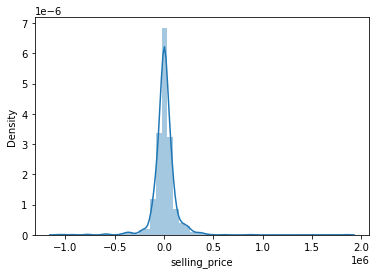

In [32]:
## Model Validation
## checking distribution of errors

sns.distplot(pred-Y_test)
# errors are normally distributed around Zero, hence good fit.

In [33]:
metrics.r2_score(Y_test,pred)

0.9725021317837426

C:\Users\haris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='selling_price'>

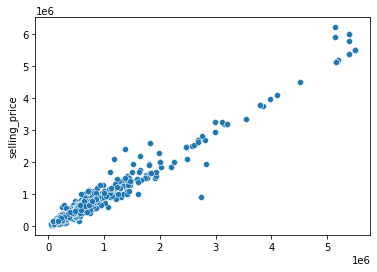

In [34]:
sns.scatterplot(pred,Y_test)

In [82]:
## Model Optimization
## Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]

# Number of Features to consider at every split
max_features = ['auto','sqrt']

# Maximum numbers of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]

# Minimum no. of samples required to split the node
min_samples_split = [2,5,10,15,100]

# Minimum no. of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

random_grid = {'n_estimators':n_estimators,
              'max_features': max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

In [83]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,
                               scoring='neg_mean_squared_error',
                              n_iter= 10, cv=5,verbose=2,random_state= 42,n_jobs=-1)

In [84]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [85]:
pred_final = rf_random.predict(X_test)

In [86]:
metrics.r2_score(Y_test,pred_final)

## default model performed good, going with default model

0.972351227413612

In [87]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [35]:
## Buidling model using default parameters

In [36]:
## storing for deployment

file = open('CarPricePrediction_rf.pkl','wb')
import pickle
pickle.dump(rf_model,file)
file.close()

In [37]:
## Data flow for deployement
dt.head()
dt.drop(columns=['selling_price'])
dt.mileage = dt.mileage.astype(float)
dt.engine = dt.engine.astype(float)
dt.max_power  = dt.max_power.astype(float)
dt.to_csv("./AppData.csv")
dt.to_csv()

In [38]:
dt1 = dt.tail(1)

In [18]:
dt.to_csv("../UsedCarPricePrediction_V2/AppData.csv")

In [19]:
dt["Brand"].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [21]:
dt

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Brand,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23,1248,74,5.0,Maruti,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21,1498,103,5.0,Skoda,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17,1497,78,5.0,Honda,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23,1396,90,5.0,Hyundai,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16,1298,88,5.0,Maruti,15
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,Petrol,Individual,Manual,First Owner,18,1197,82,5.0,Hyundai,9
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16,1493,110,5.0,Hyundai,15
8125,382000,120000,Diesel,Individual,Manual,First Owner,19,1248,73,5.0,Maruti,13
8126,290000,25000,Diesel,Individual,Manual,First Owner,23,1396,70,5.0,Tata,9


In [ ]:
dt.drop()